In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bayes' Theorem

The theorem is actually pretty simple one. Let me explain it to you.

### Conditional Probability
As a starting point let take the **conditional probability** formula:
$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

This formula says the **conditional probability** $P(A|B)$ of event $A$ to occur, given that event $B$ has already occurred is equal to:
 -  the **joint probability** $P(A \cap B)$ (meaning the probability that **both** events $A$ and $B$ occur)
 - divided by the **individual probability** of event $B$ to occur $P(B)$.

 In the same way we have as an axiom this formula (only the events are exchanged):
 
$$ P(B|A) = \frac{P(A \cap B)}{P(A)} $$

### Bayes' Theorem

So, from these two formulas we can trivially derive the **Bayes** formula:

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

Bayes' theorem gives a mathematical rule for **inverting conditional probabilities**, allowing one to find the probability of a cause given its effect. 

For example, with Bayes' theorem, one can calculate the probability that a patient has a disease given that they tested positive for that disease, using the probability that the test yields a positive result given the disease is present.

$$ P(\text{Sick} | \text{Positive test}) = \frac{P(\text{Positive test} | \text{Sick}) \cdot P(\text{Sick})}{P(\text{Positive test})} $$

#### Example
Imagine you are a 30-year old US woman who just got a positive pregnancy test. The pregnancy test is 97% accurate, but what is the actual probability of you being pregnant?

Consider that the U.S. pregnancy rate is **83 per 1,000** women aged 15-44. So, if we test 1000 women aged 15-44, then $(83*0.97) + (917*0.03) = 80.5 + 27.5 = 108$ of them would observe a positive test result.

This translates to:
$$ P(\text{Positive test} | \text{Pregnant}) = 0.97 $$
$$ P(\text{Pregnant}) = 0.083 $$
$$ P(\text{Positive test}) = 0.108$$

$$ P(\text{Pregnant} | \text{Positive test}) = \frac{P(\text{Positive test} | \text{Pregnant}) \cdot P(\text{Pregnant})}{P(\text{Positive test})} $$
$$ = \frac{0.97 \cdot 0.083}{0.108} = 0.745$$

So, if you get a positive test the probability of you being actually pregnant is **$75$%**.

# Naive Bayes

The naive Bayes model is a purely probabilistic classification model, which means the prediction is a number between 0 and 1, indicating the probability that a label is positive (e.g. the patient is sick, the email is SPAM, etc.). The main component of the naive Bayes model is the Bayes' theorem.

Bayes theorem answers the question *“What is the probability of Y given that X occurred”* (i.e. **conditional probability**). Answering this type of question is useful in ML, because if we can answer the question *“What is the probability of the label being positive given the features?”*, then we have a **classification model**. 

For example, we can build a sentiment analysis model by answering the question *“What is the probability that this sentence is happy given the words that it contains?”*

### Why is it called `Naive`
When there are too many features (in this case, words), the computation of the probability using Bayes theorem gets complicated and slow. This is where the Naive Bayes algorithm comes to our rescue. The Naive Bayes algorithm uses a slick simplification of this calculation to help us build our desired classification model. The reason it’s called **naive** is because in order to simplify the calculations, we make an assumption which isn’t necessarily true - that all features (in our case words) are completely **independent**.

# How Naive Bayes works

In short, we *naively* **multiply** all conditional probabilties.

$$ P(c | X) = \frac{P(x_1 | c) \cdot  P(x_2 | c) \cdot ... \cdot  P(x_n | c) \cdot P(c)}{P(x_1) \cdot P(x_2) \cdot ... \cdot P(x_n)} $$

However, the the denominator $P(X)$ is a condition-independent entity (it is the same for **all** classes). Therefore, in the Python implementation you won't see it. The formula will be simplified to:

$$ P(c | X) = P(x_1 | c) \cdot  P(x_2 | c) \cdot ... \cdot  P(x_n | c) \cdot P(c)$$

Further formula adaption will be executed. Instead of **multiplying** very small numbers (e.g. `0.000000001 * 0.000000002 * 0.00000003`) and stumbling upon rounding errors, we would be **adding** the probabilities.

$$ P(c | X) = log(P(x_1 | c)) +  log(P(x_2 | c)) + ... +  log(P(x_n | c)) + log(P(c))$$

The logarithm is used to minimize the 

#### Example

Let's make a NB model that predicts whether we will play, given some meteorological conditions.

Here comes the dataset with historic data:

| Weather | Temperature | Play |
| --- | --- | --- |
| Sunny | Hot | No |
| Sunny | Hot | No |
| Overcast | Hot | Yes |
| Rainy | Mild | Yes |
| Rainy | Cool | Yes |
| Rainy | Cool | No |
| Overcast | Cool | Yes |
| Sunny | Mild | No |
| Sunny | Cool | Yes |
| Rainy | Mild | Yes |
| Sunny | Mild | Yes |
| Overcast | Mild | Yes |
| Overcast | Hot | Yes |
| Rainy | Mild | No |


Now suppose you want to calculate the probability of **playing** when the weather is **overcast**, and the temperature is **mild**.

#### Solution

$$ P(\text{Play}) = \frac{9}{14} = 0.64 $$

Let's decalre $X$ as:
$$ X = \text{Overcast} \cap \text{Mild} $$

Since, we are using **naive** Bayes, we consider the *Overcast* and *Mild* events to be completely **independent**. Hence, the formula for $P(X)$ would be:
$$ P(X) = P(\text{Overcast}) \cdot P(\text{Mild}) = \frac{4}{14} \cdot \frac{6}{14} = 0.122 $$

And the conditional probability of $P(\text{X | Play})$ would be calculated by next simple formula:
$$ P(\text{X | Play}) = P(\text{Overcast | Play}) \cdot P(\text{Mild | Play}) = \frac{4}{9} \cdot \frac{4}{9} = 0.198 $$

$$ P(\text{Play} | X) = \frac{P(\text{X | Play}) \cdot P(\text{Play})}{P(X)} = \frac{0.198 \cdot 0.64}{0.122} = 1.03$$

Similarly, we can calculate the probability of **not playing** given these meteorological conditions:

$$ P(\text{X | !Play}) = P(\text{Overcast | !Play}) \cdot P(\text{Mild | !Play}) = \frac{0}{5} \cdot \frac{2}{5} = 0 $$
$$ P(\text{!Play} | X) = \frac{P(\text{X | !Play}) \cdot P(\text{!Play})}{P(X)} = \frac{0 \cdot \frac{5}{14}}{0.122} = 0$$

**Conclusion**:
The probability of a *'Yes'* class is higher ($1.03 > 0$). So you can say that if the weather is **overcast**, and the temperature is **mild**, than players **will play** the sport.


# Implementation

Now, let's implement a Naive Bayes classifier that performs **sentiment analysis** on movie reviews. Basically, it classifies a review as POSITIVE or NEGATIVE based on the indidividual probabilities of the words being used in that review (e.g. "great" has $0.90$ probability of being part of positive review).

### Data 
We will use a [common IMDB reviews dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) with 50k observations.

In [83]:
# Read the data from a gz CSV file
reviews_df = pd.read_csv('data/IMDB_Dataset.csv.gz', compression='gzip')
reviews_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [84]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [85]:
reviews_df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Our dataset set is balanced. Next, We’ll take a look at the number of characters present in each sentence. 

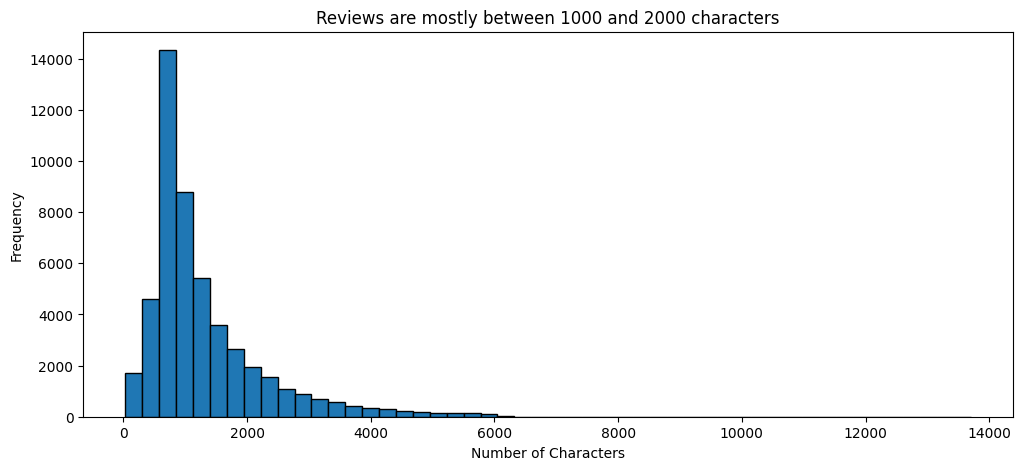

In [86]:
lengths = reviews_df['review'].str.len()
plt.figure(figsize=(12, 5))
plt.hist(lengths, bins=50, edgecolor='black')
plt.title('Reviews are mostly between 1000 and 2000 characters')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

### Preprocess

In [87]:
reviews_df.rename(columns={'review':'text', 'sentiment':'label'}, inplace = True)
reviews_df['label'] = reviews_df['label'].map({'positive':1, 'negative':0})
reviews_df['label'] = reviews_df['label'].astype('uint8')
reviews_df.head()

,text,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


#### Clean text

In [88]:
def clean_text(text: str) -> str:
    text = text.lower()                             # convert to lowercase
    text = text.replace('<br />', ' ')              # remove html tags
    # Remove meaningless suffixes
    text = text.replace('\'s', '')
    text = text.replace('\'m', '')
    text = text.replace('\'re', '')
    text = text.replace('\'ve', '')
    text = text.replace('\'d', '')
    text = text.replace('\'ll', '')
    text = text.replace('\'t', '')
    # Remove punctuation
    text = text.replace('\\', ' ')
    text = text.replace('/', ' ')
    text = text.replace('\'', ' ')
    text = text.replace('"', ' ')
    text = text.replace('(', ' ')
    text = text.replace(')', ' ')
    text = text.replace(',', ' ')
    text = text.replace('.', ' ')
    text = text.replace('!', ' ')
    text = text.replace('?', ' ')
    text = text.replace(':', '')
    text = text.replace(';', ' ')
    text = text.replace('-', ' ')
    text = text.replace('_', ' ')
    
    text = text.replace('   ', ' ')                 # remove extra spaces
    text = text.replace('  ', ' ')                  # remove extra spaces
    text = text.strip()                             # remove leading and trailing spaces
    return text

reviews_df['text'] = reviews_df['text'].apply(clean_text)

# Print the first 100 reviews
for i in range(10):
    print(reviews_df['text'][i])

one of the other reviewers has mentioned that after watching just 1 oz episode you be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn dare forget pretty pictu

### Split into words

Naively split to words, seprated by spaces.

In [89]:
reviews_df['words'] = reviews_df['text'].str.split()

# Print the first 10 reviews
for i in range(10):
    print(reviews_df['words'][i])

['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', 'you', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all', 'the', 'cells', 'ha

### Remove short words

1-character words probably won't bring much value.

In [90]:
# Remove 1-letter words
reviews_df['words'] = reviews_df['words'].apply(lambda x: [word for word in x if len(word) > 1])

# Print the first 10 reviews
for i in range(10):
    print(reviews_df['words'][i])

['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'you', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all', 'the', 'cells', 'have', 'glas

### Remove stop words

Some words (like `and`, `the`) won't bring value to the NB classification.

In [91]:
# Define stop words
stop_words = set(['and', 'the', 'this', 'that', 'is', 'was', 'were', 'has', 'have', 'had', 'you', 'he', 'she', 'it', 'we', 'they', 'my', 
                  'me', 'him', 'her', 'us', 'them', 'are', 'his', 'her', 'its', 'who', 'for', 'with', 'by', 'on', 'of', 'at', 'to', 
                  'from', 'in', 'out', 'further', 'then', 'once', 'here', 'there', 'when', 'what', 'where', 'some', 'as', 'be', 'if', 
                  'an', 'so', 'or', 'if'])

# Remove stop words
reviews_df['words'] = reviews_df['words'].apply(lambda x: [word for word in x if word not in stop_words])

# Print the first 10 reviews
for i in range(10):
    print(reviews_df['words'][i])

['one', 'other', 'reviewers', 'mentioned', 'after', 'watching', 'just', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'first', 'thing', 'struck', 'about', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'which', 'set', 'right', 'word', 'go', 'trust', 'not', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'no', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'all', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'not', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'more', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'other', 'shows', 'wouldn', 'da

List the most and least common words.

In [92]:
# List the most common words
words_by_frequency = reviews_df['words'].explode().value_counts()
words_by_frequency.head(20)

words
movie    87906
but      83521
film     79686
not      60692
one      53579
all      46914
like     40162
just     35169
about    34158
good     29728
can      29012
more     28009
very     27701
up       26388
no       25272
time     25082
even     24867
would    24596
which    23387
only     23233
Name: count, dtype: int64

In [93]:
# List the least common words
words_by_frequency.tail(20)

words
wanabees         1
audiocassette    1
shatterer        1
pppenheimer      1
lamesters        1
citations        1
pintos           1
rohna            1
demonoïd         1
amplifier        1
yeeeecchh        1
escadrille       1
eucharist        1
homunculi        1
skynet           1
ballplaying      1
yaaayyyy         1
iraquis          1
~arilin          1
macrophile       1
Name: count, dtype: int64

In [94]:
# Determine the rare words
rare_words = words_by_frequency[words_by_frequency < 3]
# Filter out words that appear less than 2 times
reviews_df['words'] = reviews_df['words'].apply(lambda x: [word for word in x if word not in rare_words])

### Tokenize

Now, we have to tokenize the words (convert them into numbers). We don't want to use an external library, hence we'll do it using a utility method.

In [95]:
WORD_TO_NUMBER_MAP = {}

# Sort all words by frequency
words_by_frequency = reviews_df['words'].explode().value_counts()

# Build the map by using word's frequency (the most frequent word gets 0, the second most frequent gets 1, etc.)
for word, _ in words_by_frequency.items():
    WORD_TO_NUMBER_MAP[word] = len(WORD_TO_NUMBER_MAP)

# Print the size of the map and its first 10 elements
print(f"The map has {len(WORD_TO_NUMBER_MAP):,} elements")
print(list(WORD_TO_NUMBER_MAP.items())[:10])
print(list(WORD_TO_NUMBER_MAP.items())[:-10])

The map has 51,680 elements
[('movie', 0), ('but', 1), ('film', 2), ('not', 3), ('one', 4), ('all', 5), ('like', 6), ('just', 7), ('about', 8), ('good', 9)]
[('movie', 0), ('but', 1), ('film', 2), ('not', 3), ('one', 4), ('all', 5), ('like', 6), ('just', 7), ('about', 8), ('good', 9), ('can', 10), ('more', 11), ('very', 12), ('up', 13), ('no', 14), ('time', 15), ('even', 16), ('would', 17), ('which', 18), ('only', 19), ('story', 20), ('really', 21), ('see', 22), ('their', 23), ('well', 24), ('than', 25), ('much', 26), ('bad', 27), ('get', 28), ('been', 29), ('other', 30), ('do', 31), ('people', 32), ('great', 33), ('will', 34), ('also', 35), ('into', 36), ('because', 37), ('how', 38), ('first', 39), ('don', 40), ('most', 41), ('made', 42), ('make', 43), ('way', 44), ('could', 45), ('too', 46), ('movies', 47), ('any', 48), ('after', 49), ('characters', 50), ('think', 51), ('watch', 52), ('character', 53), ('films', 54), ('two', 55), ('many', 56), ('seen', 57), ('being', 58), ('love', 59

In [96]:
# Convert words to numbers
def convert_words_to_numbers(words: list[str]) -> list[int]:
    return [WORD_TO_NUMBER_MAP[word] for word in words]

reviews_df['word_ids'] = reviews_df['words'].apply(convert_words_to_numbers)

for i in range(10):
    print(reviews_df['word_ids'][i])

[4, 30, 1976, 987, 49, 94, 7, 3016, 335, 3129, 146, 551, 530, 39, 93, 3168, 8, 3016, 5316, 14980, 82, 499, 18, 207, 146, 586, 86, 1655, 3, 64, 7904, 2241, 11391, 64, 2511, 14, 5857, 5457, 1389, 313, 499, 3749, 296, 297, 586, 374, 3016, 11702, 298, 14976, 6803, 2456, 976, 2626, 1336, 23734, 458, 4593, 2374, 1116, 5, 6960, 2830, 12048, 326, 16830, 3, 238, 4813, 2872, 458, 281, 56, 24751, 8106, 40542, 14872, 5009, 7732, 2365, 11, 50610, 265, 9104, 7339, 12570, 8632, 32114, 61, 166, 182, 17, 79, 221, 1248, 64, 619, 136, 208, 30, 215, 515, 2929, 754, 126, 1223, 4112, 2439, 1148, 754, 1351, 754, 803, 3016, 96, 877, 128, 39, 335, 71, 154, 3168, 1533, 2155, 352, 79, 1506, 1, 230, 11, 1335, 1190, 3016, 134, 10171, 238, 1960, 2054, 499, 3, 7, 499, 1, 7624, 7141, 4930, 2903, 23630, 6817, 434, 568, 28, 182, 24, 7589, 579, 634, 6817, 58, 587, 36, 1116, 19305, 619, 23, 503, 829, 1941, 1116, 489, 94, 3016, 141, 366, 3760, 3242, 730, 1515, 10, 28, 1137, 74, 4039, 419]
[330, 68, 291, 1298, 2892, 12, 17

### Vectorize
We need to convert each review in a vector, where $0$ means the word is not used and $1$ means the word is used.

In [97]:
# Converts a list of word IDs to a vector of 0s and 1s
def vectorize_word_ids(word_ids: list[int]) -> list[int]:
    # Create a vector of zeros (the size of the map)
    vector = np.zeros(len(WORD_TO_NUMBER_MAP), dtype=np.uint8)
    # Loop through each word in the review
    for word_id in word_ids:
        vector[word_id] = 1
    return vector
# Add new column `vector` to the dataframe with 1 vector for each review
reviews_df['vector'] = reviews_df['word_ids'].apply(vectorize_word_ids)
print(reviews_df['vector'].shape, reviews_df['vector'][0].shape)
reviews_df.head()

(50000,) (51680,)


,text,label,words,word_ids,vector
0,one of the other reviewers has mentioned that ...,1,"[one, other, reviewers, mentioned, after, watc...","[4, 30, 1976, 987, 49, 94, 7, 3016, 335, 3129,...","[0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, ..."
1,a wonderful little production the filming tech...,1,"[wonderful, little, production, filming, techn...","[330, 68, 291, 1298, 2892, 12, 17900, 12, 102,...","[0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, ..."
2,i thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, too, ho...","[135, 330, 44, 1074, 15, 46, 792, 1391, 2509, ...","[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3,basically there a family where a little boy ja...,0,"[basically, family, little, boy, jake, thinks,...","[613, 169, 68, 338, 3277, 1168, 922, 4157, 696...","[1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,petter mattei love in the time of money is a v...,1,"[mattei, love, time, money, visually, stunning...","[10592, 59, 15, 229, 2056, 1340, 2, 52, 381, 1...","[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, ..."


### Train-test split
Let's code our method for splitting the data into two pieces.

In [98]:
def train_test_split(df: pd.DataFrame, test_size: float = 0.1, random_state: int = 42) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Split the dataset into training and testing sets.
    """
    # Shuffle the dataset
    df = df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    # Calculate the number of rows in the test set
    n_test_rows = int(len(df) * test_size)
    # Split the dataset
    train_df = df.iloc[:-n_test_rows]
    test_df = df.iloc[-n_test_rows:]
    return train_df, test_df

train_df, test_df = train_test_split(reviews_df)

print(f"Train set size: {len(train_df):,}")
print(f"Test set size: {len(test_df):,}")

Train set size: 45,000
Test set size: 5,000


In [99]:
X_train = np.array(train_df['vector'].tolist())
y_train = np.array(train_df['label'].tolist())
X_test = np.array(test_df['vector'].tolist())
y_test = np.array(test_df['label'].tolist())

print(f"X_train={X_train.shape}, Dtype={X_train.dtype}")
print(f"y_train={y_train.shape},\tDtype={y_train.dtype}")

X_train=(45000, 51680), Dtype=uint8
y_train=(45000,),	Dtype=int64


### Naive Bayes Classifier

Here comes the most important part of this notebook. In implementing Naive Bayes classifier the most important questions is what approach to follow for calculating the conditional probabilities $P(x|C)$ where $x$ is an **observation** and $C$ is an **output class** (in our case these are $0$ and $1$ - *negative* and *positive*).

There three ways to calculate $P(x|C)$:
* **Gaussian**: we construct Gaussian distribution for each word by using the word **mean** (among all reviews) and its **variance**. Once we have the PDF (probability density function), we can estimate what is the probability of that word to occur in a review (e.g. having value of $1$). This approach is applicable for **continuous** data. Ours is binomial, hence we won't use **Gaussian** approach to calculate $P(x|C)$. 
* **Binomial**: Binomial or Bernoulli NB is used for **discrete** data. More specifically, when the $x_i$ is a binary value $0$ or $1$ (e.g a word occurs in a text or not). It is applicable in our case.
* **Multinomial**: Again, for **discrete** data. But without the requirement of $x_i$ being $0$4$ or $1$. This approach is useful for text classification where we count word frequency (a word could appear 2 or more times in a review). This approach will be followed in our implementation.

In contrast to first approach (which uses PDF as a likelihood function) the second and third approaches (being discrete) are using **Maximum Likelihood Estimation (MLE)** as a for measuring probability.

In [100]:
class MultinomialNaiveBayesClassifier:
    """
    Naive Bayes Classifier. It uses the Naive Bayes theorem and Laplace smoothing to classify text data.
    """

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Fit the model to the text data.

        Args:
            X: numpy array of shape (n_samples, n_words)
            y: numpy array of shape (n_samples,) - target labels
        """
        n_samples, n_words = X.shape
        self._vocab_size = n_words      # The number of unique words in the vocabulary
        self._classes = np.unique(y)    # The output classes (in our case - 0 and 1)
        n_classes = len(self._classes)  # The number of unique classes (in our case - 2)

        # Pre-calculate word counts and class (prior) probabilities for each class. We will use them later to calculate the posterior probabilities.
        self._total_words_count = np.zeros(n_classes, dtype=np.int32)
        self._word_freqs = np.zeros((n_classes, n_words), dtype=np.int32)
        self._class_probabilities = np.zeros(n_classes, dtype=np.float32)

        # For each class (in our case - 0 and 1)
        for idx, c in enumerate(self._classes):
            # Filter the samples for this class
            X_c = X[y == c]

            # Calculate the total number of words in all samples for this class
            self._total_words_count[idx] = np.sum(X_c)

            # Calculate the number of occurrences for each word in all samples for this class
            # NB: We use the np.sum method along the second axis (axis=1) to sum the values along the rows (axis=0).
            self._word_freqs[idx, :] = np.sum(X_c, axis=0)
                
            # Calculate the class (prior) probability for this class (num of class occurrences / total num of samples)
            self._class_probabilities[idx] = X_c.shape[0] / float(n_samples)

    def print(self):
        """Print the model parameters."""
        for idx, c in enumerate(self._classes):
            print(f'Class {self._classes[idx]}')
            print(f'\t Vocab size: {self._vocab_size}')
            print(f'\t Class probability: {self._class_probabilities[idx]:.2f}')
            print(f'\t Total words count: {self._total_words_count[idx]:,}')
            print(f'\t Word frequencies (max value): {np.max(self._word_freqs[idx]):,}')
            print(f'\t Word frequencies (min value): {np.min(self._word_freqs[idx]):,}')

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict the class (0 or 1) for each sample in the input data."""
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred, dtype=np.uint8)

    def _predict (self, x: np.ndarray) -> int:
        """
        Calculate the posterior probability for each class.
          P(c|X) = P(C) * P(x_1 | C) * P(x_2 | C) * P(x_3 | C) * P(x_4 | C) *  ...

        Args:
            x: numpy array of shape (n_words,) - input features (e.g. [0, 1, 0, 1, 0])

        Returns:
            int: the class with the highest posterior probability (e.g. 0 or 1)
        """
        posteriors = []

        for idx, c in enumerate(self._classes):
            # P(C) - in our case it is 0.5
            class_probability = self._class_probabilities[idx]
            # P(x_1 | C), where x_1 is the token_id of the first word, x_2 is the token_id of the second word, etc.
            word_probabilities = self._laplace_smoothing(idx, x)
            # We will use logarithm to increase the probability values and avoid UNDERFLOW issues.
            # EXAMPLE: log(0.003) = -2.52
            word_probability_logs = np.log(word_probabilities)
            #  P(c|X) = P(C) * P(x_1 | C) * P(x_2 | C) *
            posterior_probability = class_probability * np.dot(x.T, word_probability_logs)
            posteriors.append(posterior_probability)

        # Return the class with the highest posterior probability (e.g. 0 or 1)
        return self._classes[np.argmax(posteriors)]
    
    def _laplace_smoothing(self, class_idx: int, x: np.ndarray):
        """
        Calculate the posterior probability for each word in the class. We use Laplace smoothing to avoid zero probabilities.

        Laplace formula:
            P(x_i | C) = (N_i + 1) / (N + V)
        where:
            N_i - the number of occurrences of the word (within the class)
            N   - the total number of words (within the class)
            V   - the number of unique words in the vocabulary

        Args:
            class_idx: int - the index of the class
            x: numpy array of shape (n_words,) - input features (e.g. [0, 1, 0, 1, 0])

        Returns:
            numpy array of shape (n_words,) - posterior probabilities for each word
        """
        # For all words in the input vector the denominator is the same: (TOTAL_WORD_COUNT + VOCAB_SIZE)
        V = self._vocab_size
        N = self._total_words_count[class_idx]

        # For each word in the input vector we calculate the posterior probability of that word (P(x_i | C))
        # CASE 1: The word is present in the text sample
        #         N_i = self._word_counts[class_idx][i] + 1
        # CASE 2: The word is not present in the text sample
        #         For missing words return a probability of 10 (log(10) = 1). This way it won't affect the final probability product.
        word_posterior_probabilities = np.where(x == 1, (self._word_freqs[class_idx] + 1) / (N + V), 10)
        # Return a vector of posterior probabilities for each word [0.0003, 0.00027, 10, 0.0004, 0.0005]
        return word_posterior_probabilities

Now let's fit the data to the model.

In [101]:
model = MultinomialNaiveBayesClassifier()
model.fit(X_train, y_train)

# Print some stats about our model
model.print()

Class 0
	 Vocab size: 51680
	 Class probability: 0.50
	 Total words count: 2,468,193
	 Word frequencies (max value): 16,511
	 Word frequencies (min value): 0
Class 1
	 Vocab size: 51680
	 Class probability: 0.50
	 Total words count: 2,479,442
	 Word frequencies (max value): 15,724
	 Word frequencies (min value): 0


And measure its accuracy.

In [102]:
def confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray):
    """
    Calculate and print the confusion matrix
    """
    # Calculate the confusion matrix
    true_positives = sum(1 for p, y in zip(y_pred, y_true) if p == 1 and y == 1)
    true_negatives = sum(1 for p, y in zip(y_pred, y_true) if p == 0 and y == 0)
    false_positives = sum(1 for p, y in zip(y_pred, y_true) if p == 1 and y == 0)
    false_negatives = sum(1 for p, y in zip(y_pred, y_true) if p == 0 and y == 1)
    # Print the confusion matrix in a matrix format
    print(f'Confusion Matrix:')
    print(f'---------------------')
    print(f' |   0\t|  1')
    print(f'---------------------')
    print(f'0| {true_positives}\t|  {false_positives}')
    print(f'1|  {false_negatives}\t| {true_negatives}')
    print(f'---------------------')
    accuracy = (true_positives + true_negatives) / len(y_true)
    print(f'Accuracy:  {accuracy:.2f}')
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print(f'Precision: {precision:.2f}')
    print(f'Recall:    {recall:.2f}')
    print(f'F1-Score:  {f1_score:.2f}')

In [103]:
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

Confusion Matrix:
---------------------
 |   0	|  1
---------------------
0| 2177	|  344
1|  342	| 2137
---------------------
Accuracy:  0.86
Precision: 0.86
Recall:    0.86
F1-Score:  0.86


Finally, we received 86% accuracy on this dataset, which is not bad for a basic, manually written NB classifier.